# Digital Marketing Analysis 

## Introduction


Problem Statement:

An e-commerce company is looking to enhance the effectiveness of its digital marketing campaigns. Despite having a significant reach and engagement, the company is not achieving its desired conversion rates, which impacts overall sales and revenue. The company wants to understand the factors that influence customer conversions, such as demographics, customer engagement with marketing materials, and historical purchasing behavior.

Objective:

Develop a predictive model using the dataset to identify which customers are most likely to convert (make a purchase) after interacting with digital marketing campaigns. By understanding the key drivers of conversion, the company aims to:

Optimize Marketing Spend: Allocate budget more effectively by targeting customers who are more likely to convert, thus reducing cost per acquisition.
Personalize Marketing Strategies: Tailor marketing messages and offers to different customer segments based on their likelihood to convert.
Improve Customer Retention: Identify at-risk customers who are less likely to convert and develop strategies to re-engage them.

In [323]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error
from sklearn.metrics import accuracy_score


from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# read csv
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [94]:
df.shape

(8000, 18)

In [5]:
df.info()

# no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

### Age

c:\Users\ericm\anaconda3\envs\learn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


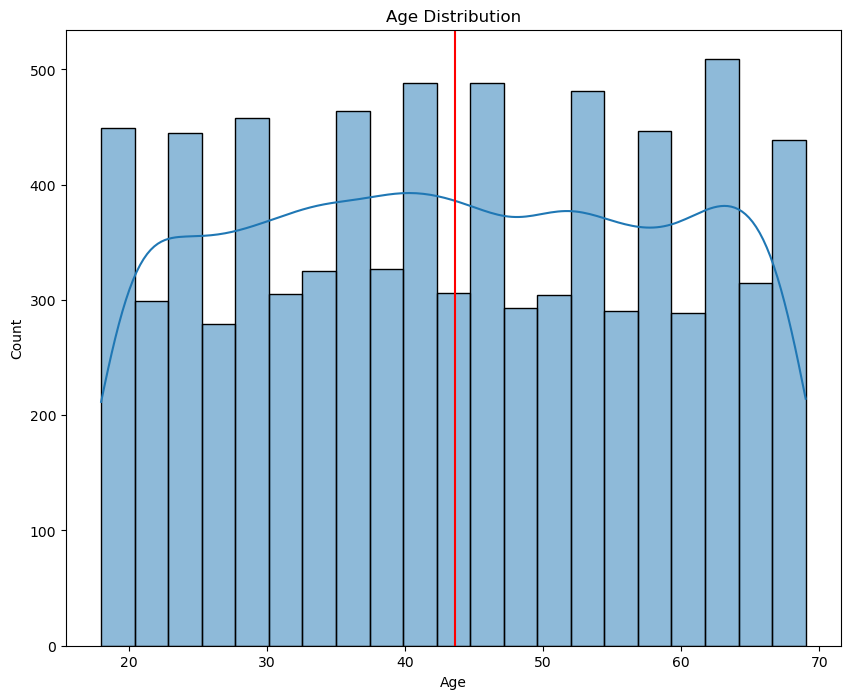

43.6255
43.0


In [100]:
# plot an age histogram

plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Age', kde=True)

mean = df['Age'].mean() # 43.6255

plt.axvline(x=mean, color= 'r')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show();

print(mean)
print(df['Age'].median())

### Gender

In [24]:
df['Gender'].value_counts()


Gender
Female    4839
Male      3161
Name: count, dtype: int64

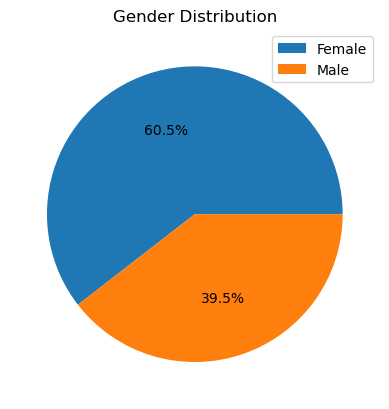

In [27]:
plt.pie(df['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Gender Distribution');
plt.legend(labels=df['Gender'].value_counts().index)

Approximately **60.5%** of the individuals in the dataset are female. 

Marketing strategies or campaigns could be adjusted to cater more to female preferences or interests, depending on the product or service being marketed.

### Campaign Channel

In [48]:
df['CampaignChannel'].value_counts()

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

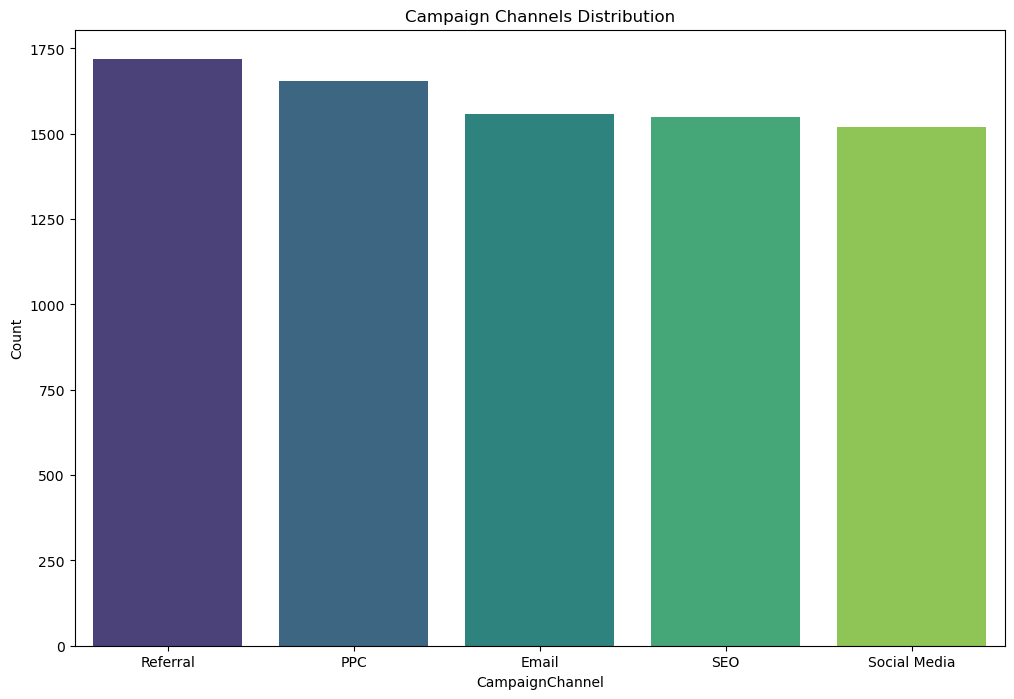

In [41]:
#plot bar plot for campaign channels
plt.figure(figsize=(12,8))

x = df['CampaignChannel'].value_counts().index
y = df['CampaignChannel'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Channels Distribution')
plt.ylabel('Count');


All channels are mostly used but the most used campaign channel is **Referrals** with (1719)

### Campaign type

In [50]:
df['CampaignType'].value_counts()

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

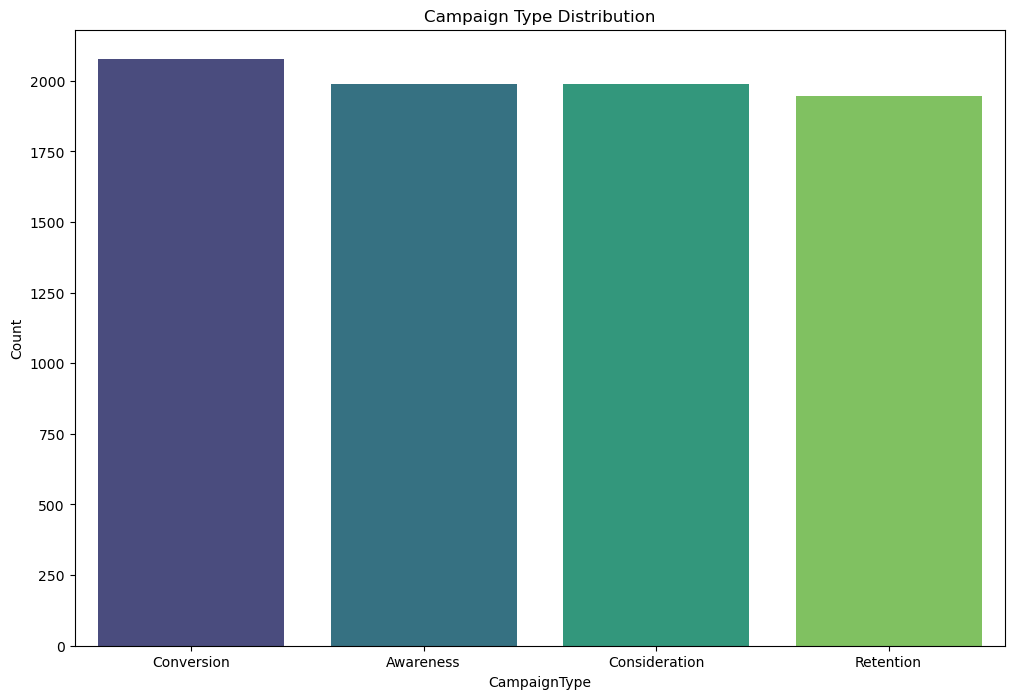

In [51]:
#plot bar plot for campaign type
plt.figure(figsize=(12,8))

x = df['CampaignType'].value_counts().index
y = df['CampaignType'].value_counts().values

sns.barplot(x=x, y=y, palette='viridis')
plt.title('Campaign Type Distribution')
plt.ylabel('Count');

All campaign types are almost equally used but the most used campaign type is **Conversion** with (2077).

### Age vs campaigntype

In [101]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


In [129]:
age_campaign = df[['Age', 'CampaignType' ]]

# define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# bin the age columns into categories
age_campaign['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_campaign

C:\Users\ericm\AppData\Local\Temp\ipykernel_21688\3265646444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_campaign['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


,Age,CampaignType,AgeGroup
0,56,Awareness,55-64
1,69,Retention,65-74
2,46,Awareness,45-54
3,32,Conversion,25-34
4,60,Conversion,55-64
...,...,...,...
7995,21,Awareness,18-24
7996,43,Retention,35-44
7997,28,Consideration,25-34
7998,19,Consideration,18-24


In [130]:
# analyze channel usage by age group
campaign_type_by_age = age_campaign.groupby('AgeGroup')['CampaignType'].value_counts().unstack()
campaign_type_by_age

C:\Users\ericm\AppData\Local\Temp\ipykernel_21688\3925217805.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_type_by_age = age_campaign.groupby('AgeGroup')['CampaignType'].value_counts().unstack()


CampaignType,Awareness,Consideration,Conversion,Retention
AgeGroup,,,,
18-24,267,282,261,221
25-34,414,351,384,380
35-44,391,398,422,374
45-54,382,394,382,408
55-64,357,373,430,375
65-74,177,190,198,189


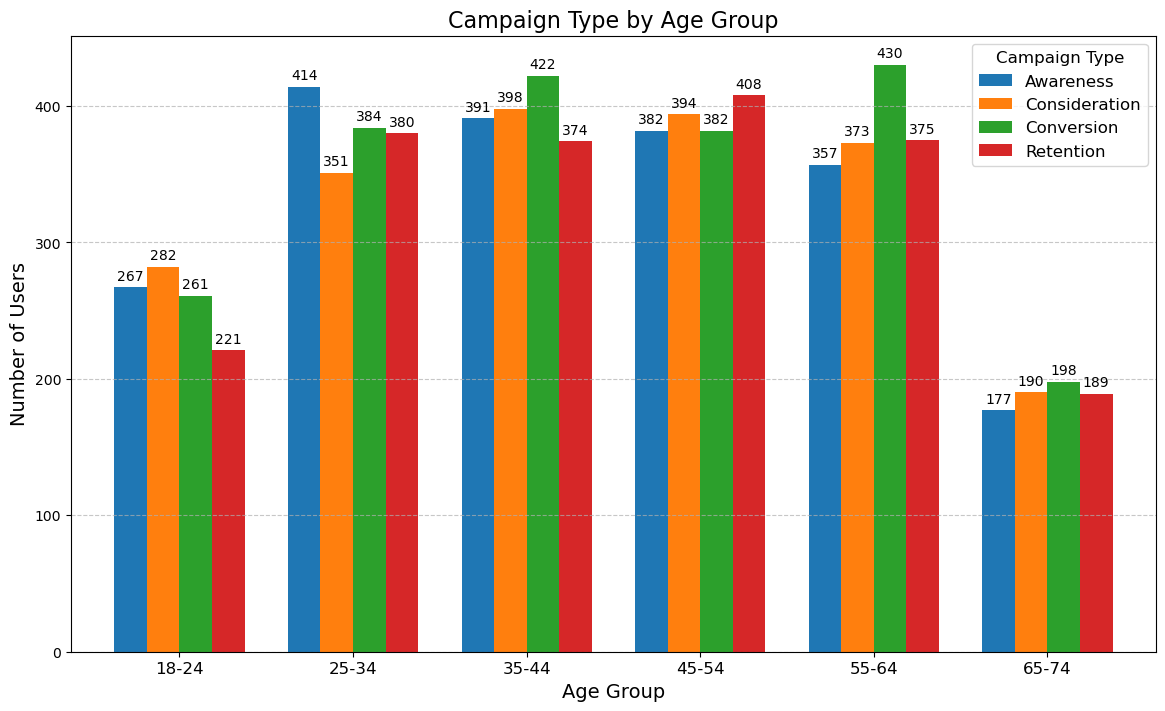

In [132]:
# Define color palette for distinct and contrasting colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot grouped bar chart
ax = campaign_type_by_age.plot(kind='bar', stacked=False, figsize=(14, 8), color=colors, width=0.75)

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

# Chart title and labels
plt.title('Campaign Type by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)

# Adjust legend and grid
plt.legend(title='Campaign Type', fontsize=12, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The distribution of each campaign type (Awareness, Consideration, Conversion, Retention) is relatively balanced across all age groups, indicating that the company’s marketing strategy is consistently applied to all age groups.

The **18-24** age group - The numbers for this group are relatively lower compared to the other groups, with the highest engagement in the '**Consideration**' campaign (282 users) and the lowest in the 'Retention' campaign (221 users).
This suggests that while younger audiences are targeted by marketing campaigns, they are not as actively engaged as other age groups, possibly due to **different interests** or **lower purchasing power.**

**25-34**: This group shows strong engagement across all campaign types, with '**Awareness**' campaigns leading (414 users). This suggests that the 25-34 age group is particularly responsive to campaigns that introduce them to new products or services. 

**35-44**: This age group has the highest counts, especially in '**Conversion**' (422 users) and 'Consideration' (398 users). This could mean that middle-aged adults are a prime target for conversion efforts, likely due to **higher purchasing power** or **more decisive buying behavior.**

**45-54**: This group also shows strong engagement across all campaign types, with '**Retention**'campaigns edging the lead (408 users). This suggests a focus on retaining the customers. 

**55-64**: This age group has a higher response to '**Conversion**' campaigns (430 users) compared to 'Awareness', indicating a focus on converting existing leads rather than attracting new ones.

65-74: As previously noted, this age group has the lowest number of users across all campaigns, indicating lower engagement or targeting.



### Age vs previous purchases

In [201]:
age_ppurchases = df[['Age', 'PreviousPurchases']]
age_ppurchases

,Age,PreviousPurchases
0,56,4
1,69,2
2,46,8
3,32,0
4,60,8
...,...,...
7995,21,7
7996,43,5
7997,28,3
7998,19,7


In [224]:
# define age bins and labels
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']

age_ppurchases['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_ppurchases

,PreviousPurchases,AgeGroup
0,4,55-64
1,2,65-74
2,8,45-54
3,0,25-34
4,8,55-64
...,...,...
7995,7,18-24
7996,5,35-44
7997,3,25-34
7998,7,18-24


In [223]:
age_ppurchases = age_ppurchases.drop('Age', axis=1)
age_ppurchases

,PreviousPurchases,AgeGroup
0,4,55-64
1,2,65-74
2,8,45-54
3,0,25-34
4,8,55-64
...,...,...
7995,7,18-24
7996,5,35-44
7997,3,25-34
7998,7,18-24


In [226]:
# group by agegroup and count
age_by_purchases = age_ppurchases.groupby('AgeGroup').count()
age_by_purchases

C:\Users\ericm\AppData\Local\Temp\ipykernel_21688\1487928834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_purchases = age_ppurchases.groupby('AgeGroup').count()


,PreviousPurchases
AgeGroup,
18-24,1031
25-34,1529
35-44,1585
45-54,1566
55-64,1535
65-74,754


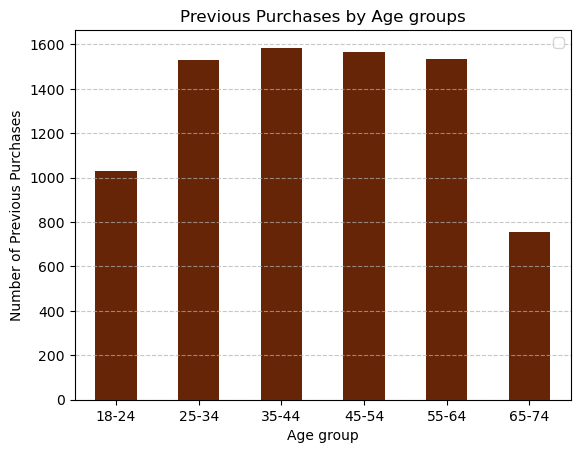

In [255]:
# plot a bar chart
age_by_purchases.plot(kind='bar', colormap='YlOrBr_r')
plt.xlabel('Age group')
plt.ylabel('Number of Previous Purchases')

# rotate x ticks
plt.xticks(rotation=0)

plt.title('Previous Purchases by Age groups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[])
plt.show();

- **18-24**: seem to have a less previous purchases which maybe attributed to less purchasing power (1031).
- **34-44**: Have the highest previous purchases count (1585). 
- **25-34**, 45-64 and 55-64 : have high previous purchases (above 1500)
- **65-74**: This group has lowest previous purchases which maybe attributed by less engagement.


### Campaign type vs Adspend

In [135]:
# group the columns
campaign_type_by_adspend = df[['CampaignType', 'AdSpend']]
campaign_type_by_adspend

,CampaignType,AdSpend
0,Awareness,6497.870068
1,Retention,3898.668606
2,Awareness,1546.429596
3,Conversion,539.525936
4,Conversion,1678.043573
...,...,...
7995,Awareness,8518.308575
7996,Retention,1424.613446
7997,Consideration,4609.534635
7998,Consideration,9476.106354


In [146]:
avg_adspend_by_campaigntype = campaign_type_by_adspend.groupby('CampaignType').agg({
    'AdSpend': 'mean'
})
avg_adspend_by_campaigntype

,AdSpend
CampaignType,
Awareness,5069.338947
Consideration,4960.399233
Conversion,4959.112653
Retention,5017.135162


<Figure size 1200x1000 with 0 Axes>

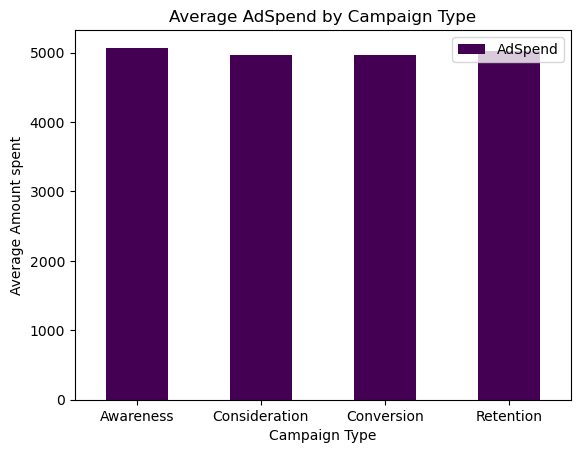

In [171]:
#plot visualization 
plt.figure(figsize=(12,10))

avg_adspend_by_campaigntype.plot(kind='bar', colormap='viridis')
plt.xlabel('Campaign Type')
plt.ylabel('Average Amount spent')
plt.title('Average AdSpend by Campaign Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.show();



On average, they spend almost equally for all marketing campaigns types. However, 'Awareness' edges the spend with ($5000). 

### Previous purchases impact on conversion

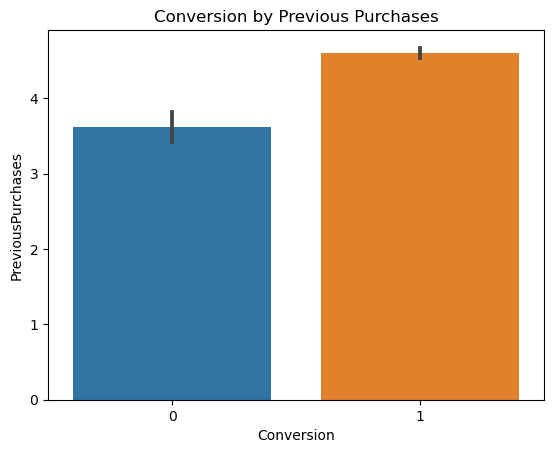

In [196]:
# barplot visualization
sns.barplot(data=df, x='Conversion', y='PreviousPurchases')
plt.title('Conversion by Previous Purchases')
plt.show();

The individuals with more previous purchases seems to result in a higher conversion.

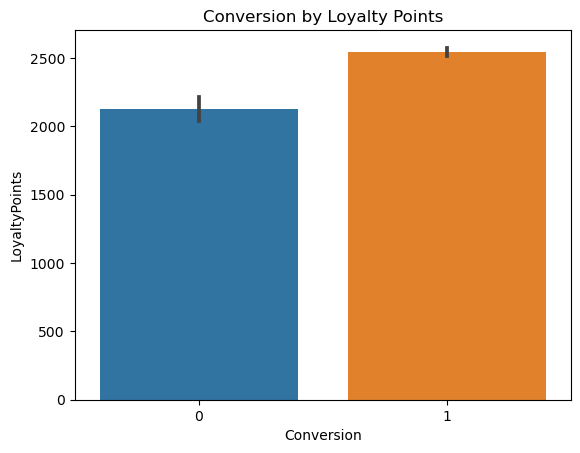

In [198]:
sns.barplot(data=df, x='Conversion', y='LoyaltyPoints')
plt.title('Conversion by Loyalty Points')
plt.show()

Higher loyalty points results to more conversion (1)

## Modelling

In [207]:
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Gender             8000 non-null   object 
 3   Income             8000 non-null   int64  
 4   CampaignChannel    8000 non-null   object 
 5   CampaignType       8000 non-null   object 
 6   AdSpend            8000 non-null   float64
 7   ClickThroughRate   8000 non-null   float64
 8   ConversionRate     8000 non-null   float64
 9   WebsiteVisits      8000 non-null   int64  
 10  PagesPerVisit      8000 non-null   float64
 11  TimeOnSite         8000 non-null   float64
 12  SocialShares       8000 non-null   int64  
 13  EmailOpens         8000 non-null   int64  
 14  EmailClicks        8000 non-null   int64  
 15  PreviousPurchases  8000 non-null   int64  
 16  LoyaltyPoints      8000 

In [ ]:
# Drop AdvertisingPlatform , AdvertisingTool
df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'], inplace=True)

### Split data

In [257]:
# define target and feature variables
y = df['Conversion']
X = df.drop(columns=['Conversion', 'CustomerID'], axis=1)

X

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709


In [273]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OHE

In [274]:
# get the categorical data for encoding
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')



In [283]:
# create dummy variably for categorical variables

ohe = OneHotEncoder(drop='first', sparse_output=False)

# fit the encoder
ohe.fit(X_train_cat)


# transform the training and testing data
X_train_cat_ohe = pd.DataFrame(
    data= ohe.transform(X_train_cat),
    columns= ohe.get_feature_names_out(X_train_cat.columns),
    index = X_train_cat.index
)

X_test_cat_ohe = pd.DataFrame(
    data=ohe.transform(X_test_cat),
    columns=ohe.get_feature_names_out(X_test_cat.columns),
    index= X_test_cat.index
)



### scale the data

In [280]:
# get numerical data for scaling
X_train_num = X_train.select_dtypes(exclude='object')
X_test_num = X_test.select_dtypes(exclude='object')

In [284]:
# initialize scaler
scaler = MinMaxScaler()

# fit the scaler
scaler.fit(X_train_num)

X_train_num_scaled = pd.DataFrame(
    data=scaler.transform(X_train_num),
    index=X_train_num.index,
    columns=X_train_num.columns
)

X_test_num_scaled = pd.DataFrame(
    data=scaler.transform(X_test_num),
    index=X_test_num.index,
    columns=X_test_num.columns
)


In [287]:
# combine the scaled numerical data with the encoded categorical data

X_train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis=1)


,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,PreviousPurchases,LoyaltyPoints,Gender_Male,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
2215,0.470588,0.492806,0.471115,0.877310,0.053733,0.714286,0.147590,0.782077,0.252525,0.631579,...,0.111111,0.073015,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2582,0.627451,0.803505,0.577997,0.579609,0.812905,0.571429,0.984694,0.547487,0.464646,0.315789,...,0.222222,0.527305,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1662,0.490196,0.532954,0.322651,0.748116,0.082244,0.551020,0.249856,0.405369,0.969697,0.578947,...,0.000000,0.283857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3027,0.549020,0.813716,0.218813,0.000578,0.339721,0.836735,0.765711,0.412524,0.525253,0.578947,...,0.888889,0.526905,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4343,0.313725,0.748754,0.202361,0.914717,0.674592,0.265306,0.537876,0.040998,0.666667,0.684211,...,0.555556,0.013403,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0.274510,0.949403,0.419164,0.213155,0.208379,0.673469,0.843512,0.177642,0.434343,0.315789,...,0.000000,0.317664,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7979,0.372549,0.724471,0.195472,0.083038,0.176077,0.836735,0.984629,0.824927,0.676768,0.526316,...,1.000000,0.115423,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1115,0.019608,0.057453,0.457548,0.293459,0.618265,0.979592,0.309069,0.400516,0.484848,0.894737,...,0.555556,0.144829,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6093,0.705882,0.116836,0.247508,0.444603,0.767320,0.244898,0.992444,0.134002,0.404040,0.947368,...,0.333333,0.867574,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Vanilla Model

In [334]:
# define a model function

def logmodel(X_train, X_test, y_train, y_test):
    """
    Function to train a logistic regression model, predict on train and test data, 
    and evaluate the model performance.
    """
    # Initiate the logistic regression model
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

    # Fit the model
    logreg.fit(X_train, y_train)
     
    # Predictions on training and testing data
    y_hat_train = logreg.predict(X_train)
    y_hat_test = logreg.predict(X_test)

    # Model evaluation
    
    # Get accuracy for train and test
    train_accuracy = accuracy_score(y_train, y_hat_train)
    test_accuracy = accuracy_score(y_test, y_hat_test)

    print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    print("------------------------------------")
    
    # Create a confusion matrix
    print("Confusion Matrix")
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    disp.plot()
    plt.show()
    
    # Get classification report
    report = classification_report(y_test, y_hat_test, target_names=['No', 'Yes'])

    print("Classification Report")
    print("------------------------------------")
    print(report)
    
    return logreg

Before addressing class imbalance:
Train Accuracy: 0.88, Test Accuracy: 0.88
------------------------------------
Confusion Matrix


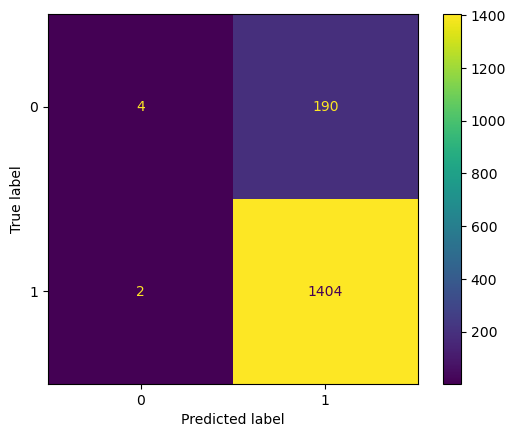

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.67      0.02      0.04       194
         Yes       0.88      1.00      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.77      0.51      0.49      1600
weighted avg       0.85      0.88      0.83      1600



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [335]:
# Evaluate the model before addressing class imbalance
print("Before addressing class imbalance:")
logmodel(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

### Model Results Interpretation 


CONFUSION MATRIX

 --------------

Model Performance Analysis:
- High True Positives (1404): The model correctly identifies most of the "Yes" cases, indicating good performance for these predictions.
- Low True Negatives (4): The model rarely predicts "No" when the actual label is "No".
- High False Positives (190): The model frequently predicts "Yes" when the actual label is "No", which is a significant source of error.
- Low False Negatives (2): The model rarely misses "Yes" cases, meaning it’s good at identifying "Yes" instances.

Classification Report

----

 - The accuracy is around 88%, which is relatively high.
 - The precision is about 88%, meaning that when the model predicts "Yes", it’s correct 88% of the time and when the model predicts "No", it is correct about 67% of the time. This is a problem. 
 - The recall is very high (99.9%), indicating the model is excellent at identifying all actual "Yes" cases. However, when the model is identifying actuall "No" cases, it is hardly correct 2% of the time, indicating a significant problem.
 - The F1-Score is about 94%, which suggests a good balance between precision and recall. On the otherhand, F1 score is about 4% which suggests an aweful imbalance between precision and recall for the "No" cases.


This may be attributed to class imbalance    'Target distribution' 

                                        Conversion
                                        1    7012
                                        0     988

Given the business context of optimizing campaign conversions:

**High Recall** is crucial since you want to capture as many potential conversions as possible.

**Precision** is also important to ensure that resources are not wasted on users unlikely to convert.


Thus, balancing between precision and recall while reducing false positives would help allocate marketing resources more effectively and improve overall campaign efficiency.

### Logistic Regression iteration 1

In [336]:
# address class imbalance using SMOTE
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
print(pd.Series(y_train_resampled).value_counts()) 

Conversion
1    5606
0    5606
Name: count, dtype: int64


Train Accuracy: 0.68, Test Accuracy: 0.69
------------------------------------
Confusion Matrix


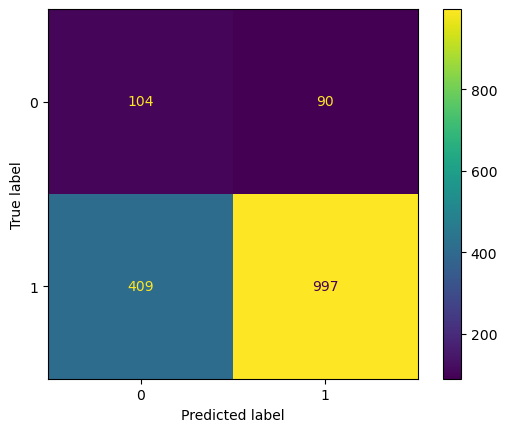

Classification Report
------------------------------------
              precision    recall  f1-score   support

          No       0.20      0.54      0.29       194
         Yes       0.92      0.71      0.80      1406

    accuracy                           0.69      1600
   macro avg       0.56      0.62      0.55      1600
weighted avg       0.83      0.69      0.74      1600



LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [337]:
# Evaluate the model after addressing class imbalance
logmodel(X_train_resampled, X_test_preprocessed, y_train_resampled, y_test)

CONFUSION MATRIX

 --------------

- True Negatives (TN): 104 — The model correctly predicted 104 instances as 'No Conversion' when there was indeed no conversion.
- False Positives (FP): 90 — The model incorrectly predicted 90 instances as 'Conversion' when there was no conversion.
- False Negatives (FN): 409 — The model incorrectly predicted 409 instances as 'No Conversion' when there was actually a conversion.
- True Positives (TP): 997 — The model correctly predicted 997 instances as 'Conversion' when there was indeed a conversion.

Classification Report

----

- The overall model accuracy reduced from the vanila model 88% to 69%.
- True Positive Rate (Recall): The model correctly identifies a significant portion of actual conversions (997 out of 1406 actual conversions), but a substantial number of actual conversions are still missed (409 instances).
- Precision: The proportion of predicted conversions that are actually conversions (997 out of 1087 predicted conversions) is somewhat moderate, indicating the model also makes some incorrect predictions when identifying conversions.


Impact of SMOTE:
- Reduction in False Negatives: Before using SMOTE, there were fewer False Negatives because the model was biased towards predicting the majority class (likely 'No Conversion'). After applying SMOTE, the model was exposed to a balanced dataset, which increased its ability to predict 'Conversion'. However, while it increased sensitivity (recall), it also increased the number of False Positives.

### Logistic Regression iteration 2